In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1. Preparing Data to be Used in Machine learning

This may involve a few steps:
    1. Split data into `features` & `labels` - `X` and `Y`.
    2. Filling (`imputing`) or disregard missing values.
    3. converting non-numerical to numerical values (`feature encoding`)

### Separate the data into Questions & Answers

In this case, the question data will be all info about the heart desease diagnostics and the answer will be the `target` column which tells whether or not the patient is sick.

In [2]:
heart_desease = pd.read_csv('data/heart-disease.csv')
x = heart_desease.drop('target', axis=1)
y = heart_desease['target']


### Split both data Into Random Train & Test Data

Here we make use of `train_test_split`. When called, it returns the x test & train data and same for y.

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [4]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### Convert Non-mumerical categories to numerical.

Here any column that could be used to group the data into rows with that similar attribute are converted to numerics as we'll see below. Let's try and predict car price based on some car features.

In [5]:
car_data = pd.read_csv('data/car-sales-extended.csv')
car_data.head()

x = car_data.drop('Price', axis=1)
y = car_data['Price']
car_data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot,categorical_features)], remainder='passthrough')

transformed_x = transformer.fit_transform(x)
transformed_x


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [7]:
transformed_x_pd = pd.DataFrame(transformed_x)
transformed_x_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


To visualize what just happened, let's use `dummies`.

In [8]:
dummies = pd.get_dummies(car_data[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


Therefore the transformations happen in some sort of truth table generation for each possible value of the categorical columns and a `1 or True` is put where the particular row is true else `0 or False` showing the row does not contain that attribute.

Without the transformation, the model won't be able t fit. See below.

In [9]:
from sklearn.ensemble import RandomForestRegressor # Regressor is best for number predictions
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train, y_train)

ValueError: could not convert string to float: 'Nissan'

But with the transformed data:

In [10]:
model.fit(transformed_x, y)

RandomForestRegressor()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)
model.score(x_test, y_test)

0.8963705059288438

### Remove or Imputate Missing values

The rows with missing values can either be filled with some dummy data or be removed completely since the ML model can only work with complete data. Either way has it's advantages and disadvantages therefore it all comes down to the situation and personal preferences.

In [12]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')

# Check the missing data
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [13]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


Therefore an error will be produced if you try to transform the data:

In [14]:
x = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')

transformed_x = transformer.fit_transform(x)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### a) FIll in the missing values using Pandas

In [15]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [16]:
car_sales_missing['Make'].fillna('missing', inplace=True)
car_sales_missing['Colour'].fillna('missing', inplace=True)
car_sales_missing['Doors'].fillna(4, inplace=True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

In [17]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [18]:
# Drop all records without a Price since it is the one to be determined by the model
car_sales_missing.dropna(inplace=True)

In [19]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

#### b) Fill missing data using Scikit-Learn

In [20]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')

# Drop rows with no label
car_sales_missing.dropna(subset='Price', inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [21]:
x = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing.Price

In [22]:
# Use impute to fill data
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with value 'missing' and numerical ones with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer() # Default strategy is mean

# Define columns
cat_features = ['Make', 'Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

# Create imputer - Something that fills missing values
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_features),
    ('num_imputer', num_imputer, num_features)
])

# Transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [23]:
car_sales_filled = pd.DataFrame(filled_x, columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [24]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [25]:
# Convert data to numbers
categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [26]:
# Now fit the model
np.random.seed(1)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)
model = RandomForestRegressor()

model.fit(x_train, y_train)
model.score(x_test, y_test)

0.25158720734485374

## 2. Choosing The Right Estimator/Algorithm/Model for A Problem

* Classification problems predict a category - If something is in a category or not. A `clf` - classifier - is used as the estimator.
* Regression problems try to predict a numeric value based on other values - Eg the price of something.

Checkout [`sklearn machine model map`](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) for more info on what model to use when.

### 2.0 Pick a Machine Learning Model for a Regression Problem

We are going to use the California Housing dataset from sklearn

In [1]:
from sklearn.datasets import fetch_california_housing
# housing = fetch_california_housing()
# housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [27]:
# housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
# housing_df['Target'] = housing.target

# # Save the data
# housing_df.to_csv('data/housing-df.csv', index=False)
housing_df = pd.read_csv('data/housing-df.csv')
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Try out different models to see which fits the situation best - Here try a linear model - Ridge

In [28]:
from sklearn.linear_model import Ridge

np.random.seed(2)

x = housing_df.drop('Target', axis=1)
y = housing_df['Target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = Ridge()
model.fit(x_train, y_train)

# This returns the coefficient of determination of the prediction.
model.score(x_test, y_test)

0.6013790960754167

### Try an ensemble model - Combines several models in it

Example is the `RandomForestClassifier` & `RandomForestRegressor` which by default uses 100 different estimators - `n_estimators` and finds the best option among them all.

In [29]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8081778065698603

### 2.1 Pick a Machine Learning Model for a Classification Problem

Here we'll try a `LinearSVC` and the `RandomForestClassifier` models

In [32]:
heart_desease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
from sklearn.svm import LinearSVC

np.random.seed(2)

x = heart_desease.drop('target', axis=1)
y = heart_desease['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = LinearSVC(dual='auto')
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8852459016393442

Now let's try the same using the `RandomForestClassifier`.

In [34]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9016393442622951

### One thing to note is
1. If you have `structured data` - like ones in a `DataFrame` - then use `ensemble` methods.
2. If the data is `unstructures`, use `deep learning` or `transfer learning`

## 3. Fit Model/Algorithm on Data and Use it to Make Predictions

### 3.0 Fit Model to Data

Here we focus mostly on the `model.fit()` and `clf.fit()`.

The names used are normally:

* `x` - Features, feature variables, data...
* `y` - Labels, targets, target variables.


What mainly happens here is that the algorithm chosen when passedin the test data, it tries and find patterns that lead to the target being either true or false. Through the analysis, later it can be able to use this knowledge to predict what a result will be if given some of the feature variables.

### 3.1 Make Predictions Using a Machine Learning Model

There are 2 ways to make predictions:
   * Using `predict()`
   * Using `predict_proba()`

#### 3.1.0 Using predict()

In [35]:
# Predictions
clf.predict(x_test)

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [36]:
# Actual expected values
np.array(y_test)

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [37]:
# Compare predictions to truth labels
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.9016393442622951

In [38]:
# Which gives the same accuracy as the score for the model
clf.score(x_test, y_test)

0.9016393442622951

In [39]:
# You can also do the same using accuracy_score
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)

0.9016393442622951

#### 3.1.1 Using predict_proba()

This one returns an array of probability estimates that the test sample is of a particular class. Example given a sample, it can tell the probability the sample is in a class/category and the probability it is not.

In [40]:
clf.predict_proba(x_test[:5])

array([[0.14, 0.86],
       [0.44, 0.56],
       [0.33, 0.67],
       [0.15, 0.85],
       [0.75, 0.25]])

#### Predict() can also be used in regression problems

In [41]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [42]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(2)

x = housing_df.drop('Target', axis=1)
y = housing_df['Target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train, y_train)

y_preds = model.predict(x_test)

array([3.0208 , 1.75481, 0.93954, ..., 1.61258, 0.88706, 2.15653])

In [43]:
y_preds[:10]

array([3.0208   , 1.75481  , 0.93954  , 3.6426811, 3.6571008, 2.4222804,
       2.61317  , 1.14951  , 1.41374  , 2.9620501])

In [44]:
np.array(y_test[:10])

array([2.787, 2.076, 0.967, 3.538, 3.905, 3.088, 2.813, 0.675, 0.99 ,
       2.822])

In [46]:
# Comparing differences in the predictions and true values
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.33313923570736453

## 3. Evaluating a Machine Learning model

Evaluation of sklearn models can be done through:
   1. Estimator's built in `score()` method.
   2. The `scoring` parameter.
   3. Problem specific metric funtion.

### 3.0. Evaluating a model using the `score` method

In [47]:
from sklearn.ensemble import RandomForestClassifier

x = heart_desease.drop('target', axis=1)
y = heart_desease['target']

x_train, x_test, y_train, y_test = train_test_split(x, y)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)


RandomForestClassifier()

In [48]:
# Highest value of the `score` method is 1.0 and lowest 0.0
clf.score(x_train, y_train)

1.0

In [49]:
clf.score(x_test, y_test)

0.8552631578947368

### 3.1 Evalueating Model Using `scoring` from `cross validation`

What `cross validation` does is that instead of just splitting the entire data into train and test samples, the dataset is split into several parts, defaults to 5, then each of these is split into train and test data. The result is an array of the performance metrics of all these individual models. The mean score can be calculated by findin gthe mean to these values.

In [51]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, x, y)

array([0.81967213, 0.8852459 , 0.7704918 , 0.83333333, 0.78333333])

If `scoring` param is not set, default value is `None` which makes the function use the estimator's default scorer - `model.score()` to calculate the accuracy of each of those individual models.

#### 3.1.0 Classification Model Evaluation Metrics

These include:

    i) Accuracy
    ii) Area under `ROC` curve.
    iii) Confusion matrix
    iv) Classification report

**Accuracy**

This can be the mean score of the `cross_val_score`

In [54]:
print(f"Cross val accuracy: {np.mean(cross_val_score(clf, x, y)) * 100:.2f}%")

Cross val accuracy: 82.16%


**Area Under Receiver Operating Characteristic Curve (AUC/ROC)**

These curves are a comparion between a model's `true positive rate (tpr)` vs `false positive rate (fpr)`.

* True Positive - Model predicts 1 when truth is 1
* False Positive - Model predicts 1 when truth is 0
* True Negative - Model predicts 0 when truth is 0
* False Negative - Model predicts 0 when truth is 1

In [55]:
from sklearn.metrics import roc_curve

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf.fit(x_train, y_train)

# Make predictions with probability
y_probs = clf.predict_proba(x_test)
y_probs[:10]


array([[0.93, 0.07],
       [0.11, 0.89],
       [0.84, 0.16],
       [0.05, 0.95],
       [0.2 , 0.8 ],
       [0.01, 0.99],
       [0.3 , 0.7 ],
       [0.74, 0.26],
       [0.67, 0.33],
       [0.03, 0.97]])

In [57]:
# Select the positive predictions - index 1
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.07, 0.89, 0.16, 0.95, 0.8 , 0.99, 0.7 , 0.26, 0.33, 0.97])

In [58]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive, )

# False positive rates
fpr

array([0.        , 0.        , 0.03030303, 0.03030303, 0.03030303,
       0.03030303, 0.03030303, 0.03030303, 0.06060606, 0.06060606,
       0.09090909, 0.09090909, 0.12121212, 0.12121212, 0.15151515,
       0.15151515, 0.21212121, 0.24242424, 0.27272727, 0.33333333,
       0.33333333, 0.39393939, 0.45454545, 0.48484848, 0.48484848,
       0.51515152, 0.54545455, 0.60606061, 1.        ])

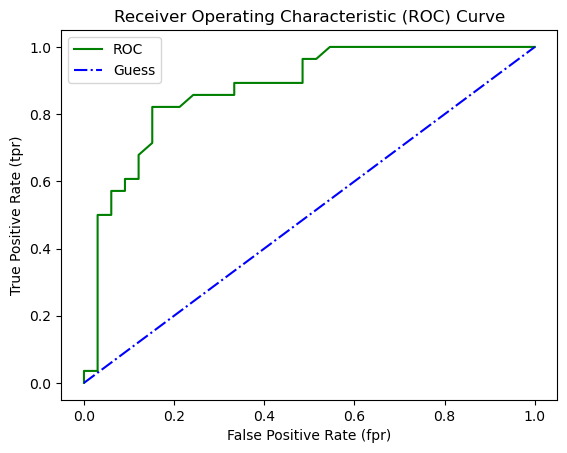

In [61]:
# Plotting a ROC curve
import matplotlib.pyplot as plt


def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve when given fpr & tpr
    """
    # Plot ROC
    plt.plot(fpr, tpr, color="green", label='ROC')
    # Plot baseline - No prediction
    plt.plot([0, 1], [0, 1], color='blue', label='Guess', linestyle='-.')
    
    # Plot customizations
    plt.xlabel('False Positive Rate (fpr)')
    plt.ylabel('True Positive Rate (tpr)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    

plot_roc_curve(fpr, tpr)

Area under curve score - `AUC score` is the total area covered by the ROC curve and gives a rate of how perfect the model was in the predictions.

In [63]:
from sklearn.metrics import roc_auc_score

# Pass true vals and model scores
roc_auc_score(y_test, y_probs_positive)

0.875

A perfect model will have an auc score of `1.0` and the graph will look like:

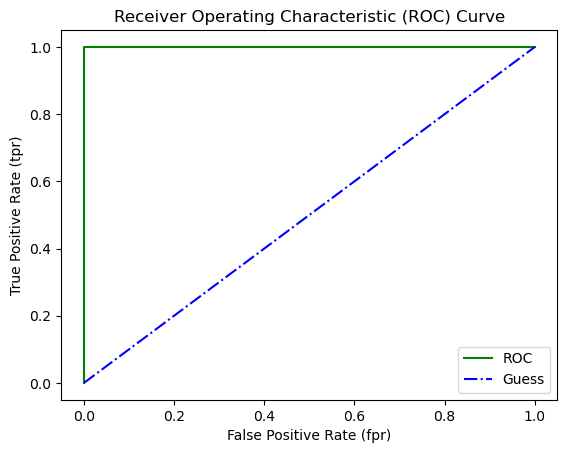

In [64]:
fpr, tpr, threshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)